# Import Libraries

In [10]:
pip install openpyxl

     |████████████████████████████████| 250 kB 2.0 MB/s eta 0:00:01     |███████████████████████████████▍| 245 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import matplotlib.patches as mpatches

# Load Dataa

## Load Deprivation data

In [ ]:
nzdep_mb = pd.read_excel('/Users/carrie/canterbury-nzdep-spatial-analysis/christchurch-nzdep-spatial-analysis/data/NZDep2023_MB2023.xlsx')
nzdep_mb.head()

,MB2023_code,NZDep2023,NZDep2023_Score,SA12023_code
0,100,10.0,1357.0,7000000
1,200,10.0,1357.0,7000000
2,300,10.0,1357.0,7000000
3,400,10.0,1209.0,7029921
4,502,10.0,1209.0,7029921


In [44]:
meshblocks_gdf = gpd.read_file('/Users/carrie/canterbury-nzdep-spatial-analysis/christchurch-nzdep-spatial-analysis/data/statsnz-meshblock-2023-generalised-SHP.zip')
meshblocks_gdf.head()

,MB2023_V1_,LANDWATER,LANDWATER_,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,0000100,12,Mainland,157.497825,157.497825,84526.158926,"MULTIPOLYGON (((1570586.396 6191027.971, 15705..."
1,0000200,12,Mainland,120.503770,120.503770,122885.186789,"MULTIPOLYGON (((1601317.232 6194284.576, 16013..."
2,0000300,12,Mainland,7.481859,7.481859,28321.227739,"POLYGON ((1588835.236 6182978.626, 1588997.429..."
3,0001500,12,Mainland,28.420141,28.420141,31363.003051,"POLYGON ((1613765.252 6146666.238, 1613780.029..."
4,0001600,12,Mainland,0.451940,0.451940,2947.988123,"POLYGON ((1617907.153 6137956.947, 1618004.873..."


In [95]:
print(meshblocks_gdf.columns)


Index(['MB2023_V1_', 'LANDWATER', 'LANDWATER_', 'LAND_AREA_', 'AREA_SQ_KM',
       'Shape_Leng', 'geometry'],
      dtype='object')


## Select Christchurch Meshblocks

The meshblock shapefile alone does not contain Christchurch labels. Need to download the "Geographic Areas Table 2023" from Stats NZ, which links meshblock codes to territorial authorities (including Christchurch City) https://datafinder.stats.govt.nz/table/111243-geographic-areas-table-2023/

In [ ]:
# Load Geographic Areas Table 2023 as Area
areas = pd.read_csv('/Users/carrie/canterbury-nzdep-spatial-analysis/christchurch-nzdep-spatial-analysis/data/geographic-areas-table-2023.csv')
# Check the relevant columns
print(areas.columns)

Index(['MB2023_code', 'MB2022_code', 'MB2018_code', 'MB2013_code',
       'MB2011_code', 'MB2010_code', 'MB2006_code', 'MB2001_code',
       'SA12023_code', 'SA12018_code', 'SA22023_code', 'SA22023_name',
       'SA22023_name_ascii', 'SA22018_code', 'SA22018_name', 'SA32023_code',
       'SA32023_name', 'SA32023_name_ascii', 'UR2023_code', 'UR2023_name',
       'UR2023_name_ascii', 'IUR2023_code', 'IUR2023_name', 'UR2018_code',
       'UR2018_name', 'IUR2018_code', 'IUR2018_name', 'IUA2023_code',
       'IUA2023_name', 'FUA2023_code', 'FUA2023_name', 'FUA2023_name_ascii',
       'IFUA2023_code', 'IFUA2023_name', 'TFUA2023_code', 'TFUA2023_name',
       'TA2023_code', 'TA2023_name', 'TA2023_name_ascii', 'WARD2023_code',
       'WARD2023_name', 'WARD2023_name_ascii', 'MWARD2023_code',
       'MWARD2023_name', 'MWARD2023_name_ascii', 'CB2023_code', 'CB2023_name',
       'CB2023_name_ascii', 'TASUB2023_code', 'TASUB2023_name',
       'TASUB2023_name_ascii', 'REGC2023_code', 'REGC2023_name'

Load and merge with New Zealand meshblocks_gdf using the meshblock code.

In [115]:
meshblocks_gdf['MB2023_V1_'] = meshblocks_gdf['MB2023_V1_'].astype(str)
areas['MB2023_code'] = areas['MB2023_code'].astype(str)
meshblocks_with_area = meshblocks_gdf.merge(
    areas[['MB2023_code', 'TA2023_name']],
    left_on='MB2023_V1_',
    right_on='MB2023_code',
    how='left'
)
chch_urban_mb_codes = areas[areas['UA2017_name'] == 'Christchurch']['MB2023_code']
chch_meshblocks_gdf = meshblocks_gdf[meshblocks_gdf['MB2023_V1_'].isin(chch_urban_mb_codes)]
chch_meshblocks_gdf.head()

,MB2023_V1_,LANDWATER,LANDWATER_,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
1742,2554700,12,Mainland,0.035661,0.035661,1029.715611,"POLYGON ((1576684.184 5175213.055, 1576683.282..."
1832,2671400,12,Mainland,0.037709,0.037709,780.364635,"POLYGON ((1568134.237 5182238.991, 1567934.573..."
2016,2673000,12,Mainland,0.022011,0.022011,640.798835,"POLYGON ((1568620.924 5182470.440, 1568438.229..."
2417,2674200,12,Mainland,0.011877,0.011877,473.957467,"POLYGON ((1569243.668 5182129.450, 1569097.094..."
2842,2680200,12,Mainland,0.051452,0.051452,914.752426,"POLYGON ((1570895.052 5183389.406, 1570869.165..."


## Load public transport data

In [64]:
bus_stops_gpd = gpd.read_file('/Users/carrie/canterbury-nzdep-spatial-analysis/christchurch-nzdep-spatial-analysis/data/Bus_Stop_(OpenData).zip')
bus_stops_gpd.head()

,BusStopID,CreateDate,LastEditDa,geometry
0,4641,None,None,POINT (1557030.890 5177249.633)
1,4642,None,None,POINT (1557032.116 5177262.669)
2,4643,None,None,POINT (1557369.616 5177769.060)
3,4644,None,None,POINT (1557385.067 5177770.602)
4,4645,None,None,POINT (1557456.994 5177603.341)


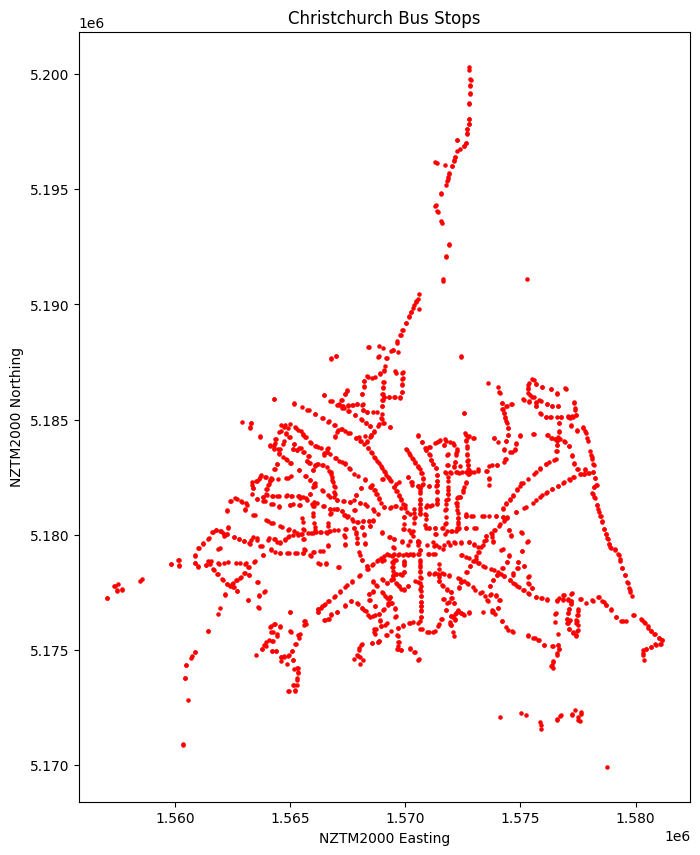

In [65]:
# Plot all bus stops as points
ax = bus_stops_gdf.plot(figsize=(10, 10), color='red', markersize=5)
plt.title('Christchurch Bus Stops')
plt.xlabel('NZTM2000 Easting')
plt.ylabel('NZTM2000 Northing')
plt.show()

In [66]:
cycleways_gdf = gpd.read_file('/Users/carrie/canterbury-nzdep-spatial-analysis/christchurch-nzdep-spatial-analysis/data/Cycleway_(OpenData).zip')
cycleways_gdf.head()

,CyclewayID,ServiceSta,MajorCycle,Type,StrategicN,PublicRele,Ownership,TrafficDir,CreateDate,LastEditDa,SHAPE_Leng,geometry
0,1,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,39.606516,"LINESTRING (1568441.987 5184185.999, 1568439.8..."
1,2,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,32.635594,"LINESTRING (1568570.873 5184371.178, 1568551.8..."
2,3,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,85.990664,"LINESTRING (1568634.522 5184459.744, 1568633.9..."
3,4,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,39.392926,"LINESTRING (1568733.033 5184601.638, 1568721.2..."
4,5,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,17.428885,"LINESTRING (1568743.124 5184615.849, 1568742.1..."


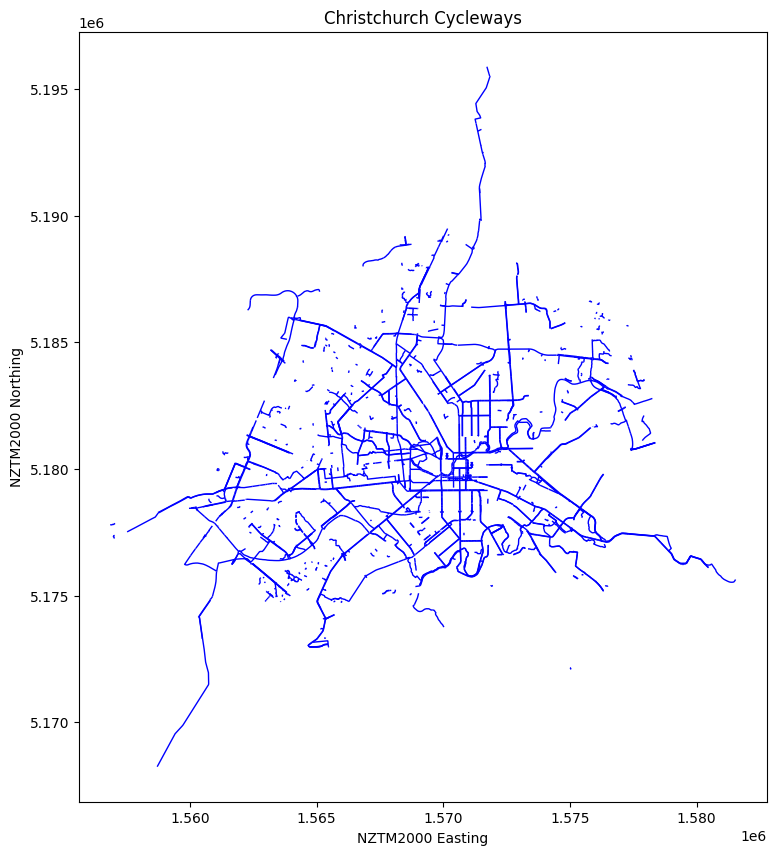

In [67]:
# Basic plot of all cycleways
cycleways_gdf.plot(figsize=(10, 10), color='blue', linewidth=1)
plt.title('Christchurch Cycleways')
plt.xlabel('NZTM2000 Easting')
plt.ylabel('NZTM2000 Northing')
plt.show()

# Data Process

## Check Coordinate

All layers are already in NZTM2000 (EPSG:2193), which is the standard projected coordinate system for New Zealand

In [102]:
print(bus_stops_gpd.crs)
print(cycleways_gdf.crs)
print(chch_meshblocks_gdf.crs)

EPSG:2193
EPSG:2193
EPSG:2193


## Merge the deprivation data into Christchurch meshblock boundaries

In [116]:
chch_meshblocks_gdf = chch_meshblocks_gdf.copy()
chch_meshblocks_gdf['MB2023_V1_'] = chch_meshblocks_gdf['MB2023_V1_'].astype(str).str.zfill(7)

In [117]:
chch_nzdep = chch_meshblocks_gdf.merge(
    nzdep_mb,
    left_on='MB2023_V1_',
    right_on='MB2023_code',
    how='left'
)
chch_nzdep.head()

,MB2023_V1_,LANDWATER,LANDWATER_,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,MB2023_code,NZDep2023,NZDep2023_Score,SA12023_code
0,2554700,12,Mainland,0.035661,0.035661,1029.715611,"POLYGON ((1576684.184 5175213.055, 1576683.282...",2554700,8.0,1046.0,7036110.0
1,2671400,12,Mainland,0.037709,0.037709,780.364635,"POLYGON ((1568134.237 5182238.991, 1567934.573...",2671400,2.0,901.0,7025356.0
2,2673000,12,Mainland,0.022011,0.022011,640.798835,"POLYGON ((1568620.924 5182470.440, 1568438.229...",2673000,3.0,925.0,7025509.0
3,2674200,12,Mainland,0.011877,0.011877,473.957467,"POLYGON ((1569243.668 5182129.450, 1569097.094...",2674200,4.0,953.0,7025512.0
4,2680200,12,Mainland,0.051452,0.051452,914.752426,"POLYGON ((1570895.052 5183389.406, 1570869.165...",2680200,3.0,921.0,7025785.0


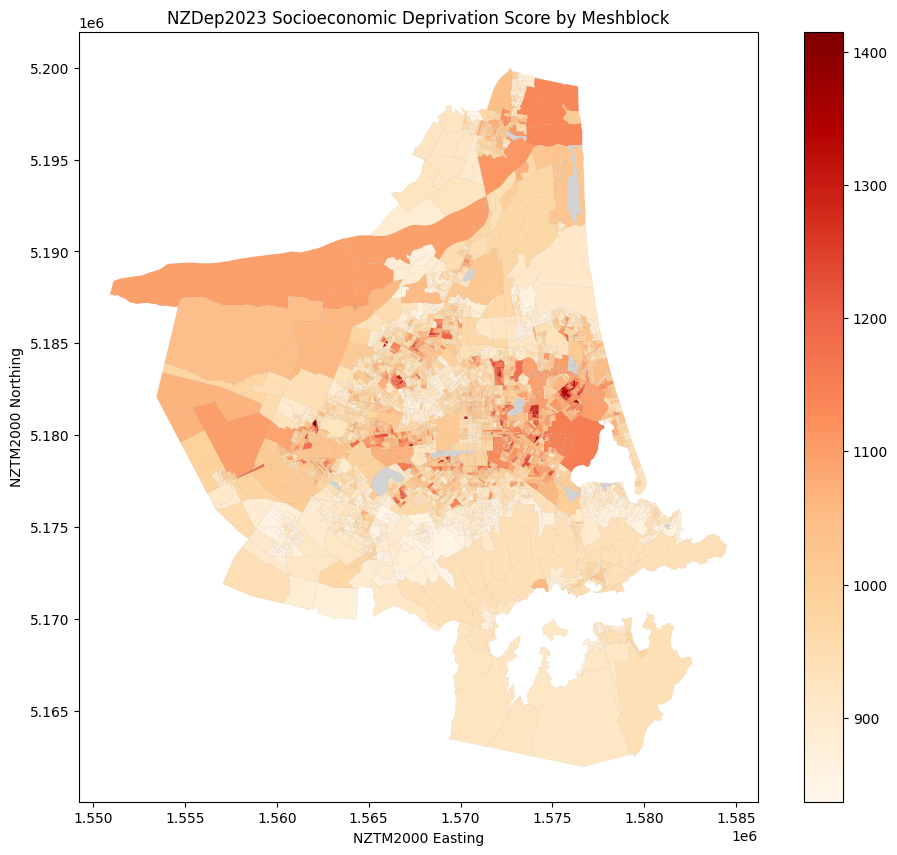

In [118]:
ax = chch_nzdep.plot(
    column='NZDep2023_Score',
    cmap='OrRd',
    legend=True,
    figsize=(12, 10),
    edgecolor='black',
    linewidth=0.02,
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)

plt.title('NZDep2023 Socioeconomic Deprivation Score by Meshblock')
plt.xlabel('NZTM2000 Easting')
plt.ylabel('NZTM2000 Northing')
plt.show()


In [119]:
print(chch_nzdep.isnull().sum())

MB2023_V1_          0
LANDWATER           0
LANDWATER_          0
LAND_AREA_          0
AREA_SQ_KM          0
Shape_Leng          0
geometry            0
MB2023_code        48
NZDep2023          49
NZDep2023_Score    49
SA12023_code       48
dtype: int64


NZDep2023 is calculated at the SA1 level, not for every meshblock. Some meshblocks do not have a deprivation value because:
They are in areas with too few residents (often <100 people).
They are in non-residential areas (industrial, parks, water, etc.).
The data for those meshblocks/SA1s was withheld or not available due to privacy, data quality, or population size

## Join bus stops to meshblock

In [120]:
# Ensure both GeoDataFrames use the same CRS
bus_stops_gpd = bus_stops_gpd.to_crs(chch_nzdep.crs)

# Spatial join: assign each bus stop to the meshblock it falls within
bus_stops_with_nzdep = gpd.sjoin(
    bus_stops_gpd,
    chch_nzdep[['MB2023_V1_', 'NZDep2023', 'NZDep2023_Score', 'geometry']],
    how='left',
    predicate='within'  # Each point inherits the attributes of the polygon it is within
)

bus_stops_with_nzdep.head()

,BusStopID,CreateDate,LastEditDa,geometry,index_right,MB2023_V1_,NZDep2023,NZDep2023_Score
0,4641,None,None,POINT (1557030.890 5177249.633),136.0,4006626,2.0,903.0
1,4642,None,None,POINT (1557032.116 5177262.669),726.0,2496023,2.0,908.0
2,4643,None,None,POINT (1557369.616 5177769.060),727.0,2496200,7.0,1010.0
3,4644,None,None,POINT (1557385.067 5177770.602),728.0,2496300,6.0,993.0
4,4645,None,None,POINT (1557456.994 5177603.341),217.0,4009876,5.0,963.0


## Join cycleways (lines) to meshblocks (polygons) 

In [121]:
# Ensure both GeoDataFrames use the same CRS
cycleways_gdf = cycleways_gdf.to_crs(chch_nzdep.crs)

# Spatial join: assign each cycleway segment to the meshblock(s) it intersects
cycleways_with_nzdep = gpd.sjoin(
    cycleways_gdf,
    chch_nzdep[['MB2023_V1_', 'NZDep2023', 'NZDep2023_Score', 'geometry']],
    how='left',
    predicate='intersects'  # Each line gets attributes of polygons it crosses
)

cycleways_with_nzdep.head()

,CyclewayID,ServiceSta,MajorCycle,Type,StrategicN,PublicRele,Ownership,TrafficDir,CreateDate,LastEditDa,SHAPE_Leng,geometry,index_right,MB2023_V1_,NZDep2023,NZDep2023_Score
0,1,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,39.606516,"LINESTRING (1568441.987 5184185.999, 1568439.8...",2662,2661800,6.0,983.0
1,2,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,32.635594,"LINESTRING (1568570.873 5184371.178, 1568551.8...",276,2664400,7.0,1019.0
2,3,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,85.990664,"LINESTRING (1568634.522 5184459.744, 1568633.9...",2684,2664300,7.0,1013.0
3,4,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,39.392926,"LINESTRING (1568733.033 5184601.638, 1568721.2...",2683,2664200,8.0,1048.0
4,5,In Service,None,Cycle lane,C2,No Public Relevance,CCC,None,2021-03-23,2021-08-11,17.428885,"LINESTRING (1568743.124 5184615.849, 1568742.1...",2683,2664200,8.0,1048.0


# Exploratory Spatial Analysis

## Count bus stops per meshblock

Aggregate the number of bus stops in each meshblock to identify areas with high or low access.

In [122]:
bus_stop_counts = bus_stops_with_nzdep.groupby('MB2023_V1_').size().rename('bus_stop_count')
chch_nzdep = chch_nzdep.join(bus_stop_counts, on='MB2023_V1_')
chch_nzdep['bus_stop_count'] = chch_nzdep['bus_stop_count'].fillna(0)

## Cycleway coverage per meshblock

Calculate the total length of cycleway segments within each meshblock

In [123]:
cycleways_with_nzdep['length_m'] = cycleways_with_nzdep.geometry.length
cycleway_lengths = cycleways_with_nzdep.groupby('MB2023_V1_')['length_m'].sum()
chch_nzdep = chch_nzdep.join(cycleway_lengths, on='MB2023_V1_')
chch_nzdep['length_m'] = chch_nzdep['length_m'].fillna(0)

## Visualization 

/var/folders/7d/w_c5b5f50wgdnxsk90_w9gzw0000gn/T/ipykernel_22765/3693664834.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


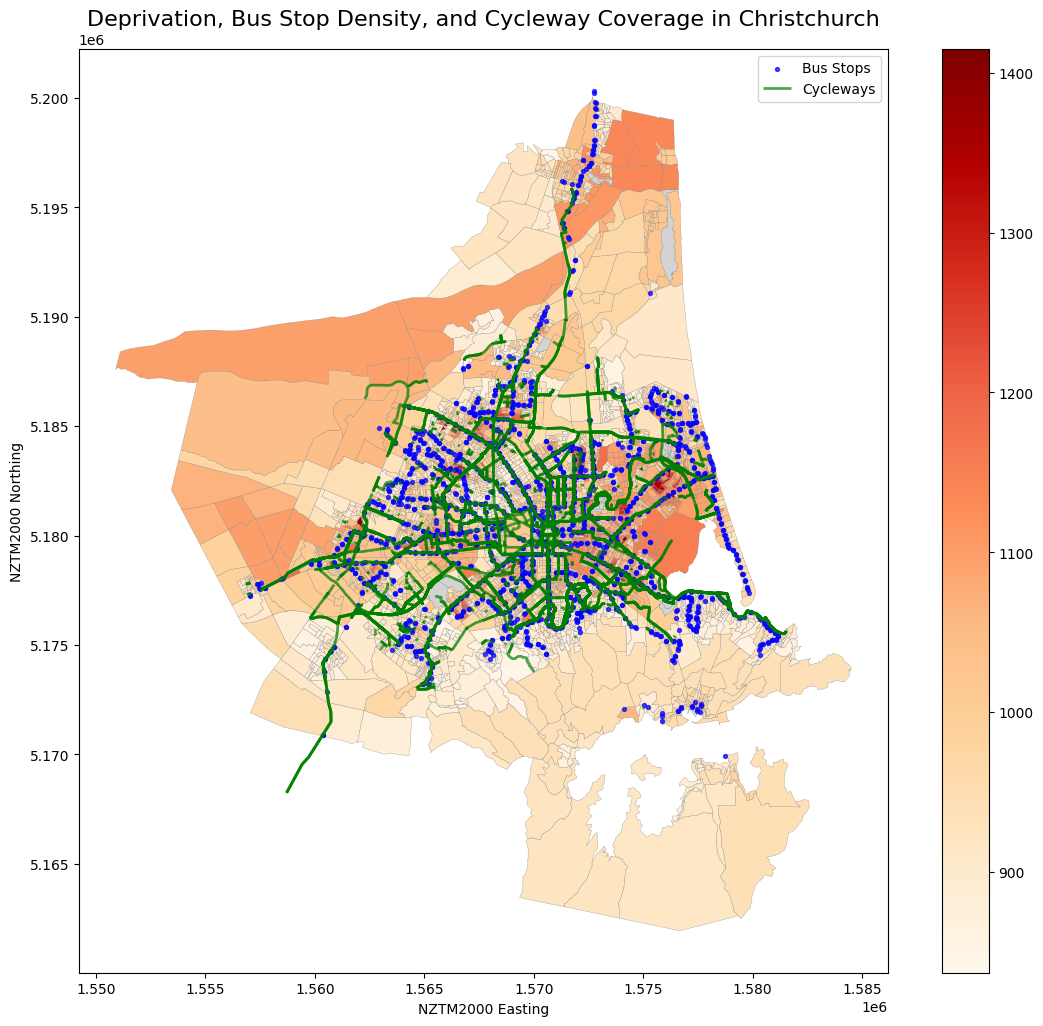

In [124]:
fig, ax = plt.subplots(figsize=(14, 12))

# 1. Plot meshblocks colored by deprivation score (NZDep2023_Score)
chch_nzdep.plot(
    column='NZDep2023_Score',
    cmap='OrRd',
    legend=True,
    edgecolor='grey',
    linewidth=0.2,
    ax=ax,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)

# 2. Overlay bus stops as blue points
bus_stops_with_nzdep.plot(
    ax=ax,
    color='blue',
    markersize=8,
    alpha=0.7,
    label='Bus Stops'
)

# 3. Overlay cycleways as green lines
cycleways_with_nzdep.plot(
    ax=ax,
    color='green',
    linewidth=2,
    alpha=0.7,
    label='Cycleways'
)

plt.title('Deprivation, Bus Stop Density, and Cycleway Coverage in Christchurch', fontsize=16)
plt.xlabel('NZTM2000 Easting')
plt.ylabel('NZTM2000 Northing')
plt.legend()
plt.show()


# Further Analysis 

## Calculate proximity of meshblock centroids to nearest bus stop

In [128]:
# Get meshblock centroids
chch_nzdep['centroid'] = chch_nzdep.geometry.centroid
chch_centroids = chch_nzdep.set_geometry('centroid')

# Calculate distance to nearest bus stop
# Make sure both are in the same CRS
chch_centroids = chch_centroids.to_crs(bus_stops_with_nzdep.crs)

In [135]:
# Clean up column name conflicts
for col in ['index_left', 'index_right']:
    chch_centroids = chch_centroids.drop(columns=col, errors='ignore')
    bus_stops_with_nzdep = bus_stops_with_nzdep.drop(columns=col, errors='ignore')
    
# Calculate Nearest Bus Stop and Distance
nearest_bus_stops = gpd.sjoin_nearest(
    chch_centroids,
    bus_stops_with_nzdep,
    how='left',
    distance_col='dist_to_bus_stop'
)
nearest_bus_stops = nearest_bus_stops.rename(columns={
    'NZDep2023_Score_left': 'NZDep2023_Score',
    'NZDep2023_left': 'NZDep2023'
})

nearest_bus_stops[['MB2023_code', 'NZDep2023_Score', 'dist_to_bus_stop']].head()


,MB2023_code,NZDep2023_Score,dist_to_bus_stop
0,2554700,1046.0,92.160483
1,2671400,901.0,266.513360
2,2673000,925.0,245.402693
3,2674200,953.0,288.171235
4,2680200,921.0,282.901661


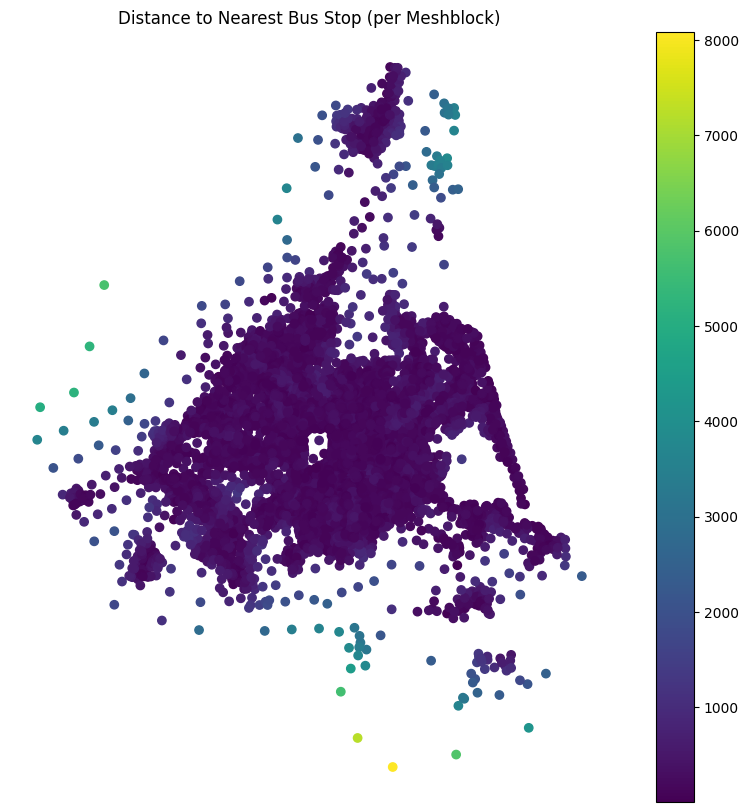

In [ ]:
nearest_bus_stops.plot(column='dist_to_bus_stop', cmap='viridis', legend=True, figsize=(12, 10))
plt.title('Distance to Nearest Bus Stop (per Meshblock)')
plt.axis('off')
plt.show()

## Calculate distance to nearest cycleway

In [137]:
# Assuming cycleways_with_nzdep is GeoDataFrame of cycleways
chch_centroids = chch_centroids.to_crs(cycleways_with_nzdep.crs)
chch_centroids['dist_to_cycleway'] = chch_centroids.geometry.apply(
    lambda centroid: cycleways_with_nzdep.distance(centroid).min()
)

## Flag High-Deprivation, Poor-Access Meshblocks

Identify meshblocks with both high deprivation and poor access to public transport

In [140]:
# Example assuming 'MB2023_code' is your unique key
chch_centroids = chch_centroids.merge(
    nearest_bus_stops[['MB2023_code', 'dist_to_bus_stop']],
    on='MB2023_code',
    how='left'
)

In [142]:
# Example thresholds (adjust as needed)
deprivation_threshold = chch_centroids['NZDep2023_Score'].quantile(0.8)  # Top 20% most deprived
bus_access_threshold = 500  # meters
cycleway_access_threshold = 500

chch_centroids['high_deprivation'] = chch_centroids['NZDep2023_Score'] >= deprivation_threshold
chch_centroids['poor_bus_access'] = chch_centroids['dist_to_bus_stop'] > bus_access_threshold

chch_centroids['poor_cycleway_access'] = chch_centroids['dist_to_cycleway'] > cycleway_access_threshold

# Combine criteria for priority areas
chch_centroids['priority_area'] = chch_centroids['high_deprivation'] & chch_centroids['poor_bus_access']
chch_centroids['priority_area'] = chch_centroids['high_deprivation'] & chch_centroids['poor_bus_access'] & chch_centroids['poor_cycleway_access']


## Visualize or export results

Highlight or export meshblocks where priority_area is True for targeted recommendations.

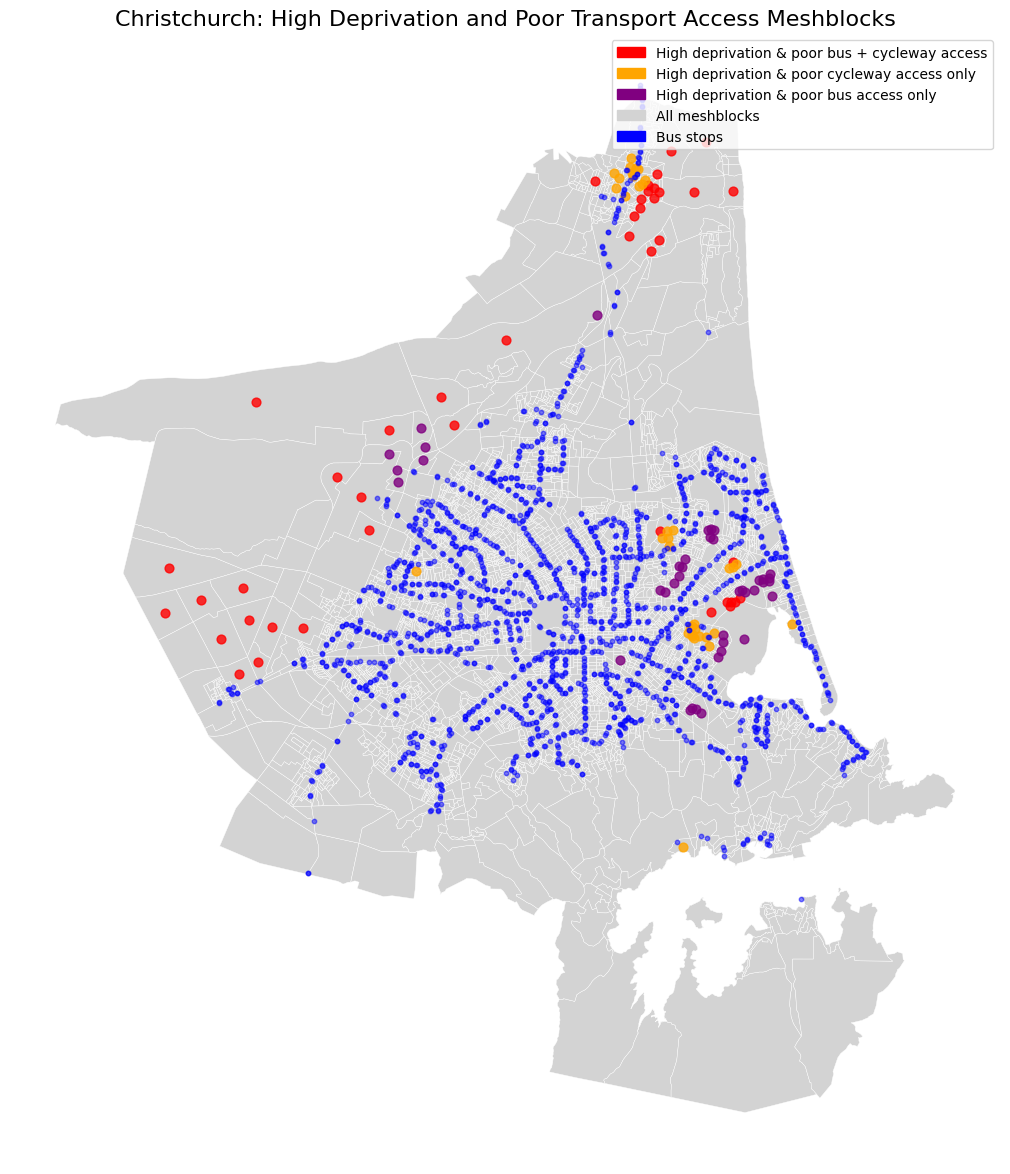

In [146]:
fig, ax = plt.subplots(figsize=(14, 12))

# Plot all meshblocks as a base layer
chch_meshblocks_gdf.plot(
    ax=ax,
    color='lightgrey',
    edgecolor='white',
    linewidth=0.3
)

# Plot high deprivation & poor bus + cycleway access (red)
chch_centroids[chch_centroids['priority_area']].plot(
    ax=ax,
    color='red',
    markersize=40,
    label='High deprivation & poor bus + cycleway access',
    alpha=0.8
)

# Plot high deprivation & poor cycleway only (orange)
chch_centroids[
    (chch_centroids['high_deprivation']) &
    (chch_centroids['poor_cycleway_access']) &
    (~chch_centroids['priority_area'])
].plot(
    ax=ax,
    color='orange',
    markersize=40,
    label='High deprivation & poor cycleway access only',
    alpha=0.8
)

# Plot high deprivation & poor bus only (purple)
chch_centroids[
    (chch_centroids['high_deprivation']) &
    (chch_centroids['poor_bus_access']) &
    (~chch_centroids['priority_area'])
].plot(
    ax=ax,
    color='purple',
    markersize=40,
    label='High deprivation & poor bus access only',
    alpha=0.8
)

# Plot all bus stops
bus_stops_with_nzdep.plot(
    ax=ax,
    color='blue',
    markersize=10,
    alpha=0.5,
    label='Bus stops'
)

# Legend
handles = [
    mpatches.Patch(color='red', label='High deprivation & poor bus + cycleway access'),
    mpatches.Patch(color='orange', label='High deprivation & poor cycleway access only'),
    mpatches.Patch(color='purple', label='High deprivation & poor bus access only'),
    mpatches.Patch(color='lightgrey', label='All meshblocks'),
    mpatches.Patch(color='blue', label='Bus stops')
]
ax.legend(handles=handles, loc='upper right', fontsize=10)

# Clean up plot
ax.set_title('Christchurch: High Deprivation and Poor Transport Access Meshblocks', fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()

# Summary

This analysis examined the spatial relationship between socioeconomic deprivation and transport access in Christchurch, using meshblock-level data combined with NZDep2023 deprivation scores and proximity to bus stops and cycleways.

- Key findings include:

Concentration of Need: High deprivation areas with poor access to public transport and cycleways are spatially clustered, predominantly in peripheral neighborhoods and some inner-city pockets.

Transport Gaps: While bus stops are generally well distributed, several deprived neighborhoods remain underserved, particularly on the urban fringe.

Cycleway Deficit: Active transport infrastructure is less accessible in many deprived areas, highlighting a gap in cycleway provision.

Priority Areas: Meshblocks identified with both high deprivation and poor access to bus and cycleway infrastructure represent critical zones for targeted intervention.

- Recommendations

Targeted Infrastructure Investment
Prioritize expanding bus stop coverage and frequency in identified high-need neighborhoods.
Develop and improve cycleway networks in deprived areas lacking safe and convenient active transport routes.

- Integrated Transport Planning

Coordinate public transport and active transport planning to provide multimodal connectivity, particularly in priority areas.
Engage local communities to understand specific barriers and tailor solutions accordingly.

- Equity-Focused Policy

Use spatial deprivation and access data to guide funding and service decisions, ensuring resources address the greatest needs.
Monitor transport equity outcomes regularly to measure progress and adjust strategies.

- Further Research and Monitoring

Incorporate additional factors such as pedestrian infrastructure, service frequency, and affordability to deepen understanding of transport disadvantage.
Update analyses with new data releases to track changes over time.